# Reading licel files

In [3]:
# Import plotting library
from matplotlib import pyplot as plt

import glob

# Import the module for licel files
from atmospheric_lidar import licel
import atmospheric_lidar

print(atmospheric_lidar.__version__)


0.5.5


In [4]:
# Read the file
licel_file = licel.LicelFile('./sample_data/measurement_1/a24C0506.105499')

# The licel file object has several properties describing the file
print("Start time: {}, Stop times: {}".format(licel_file.start_time, licel_file.stop_time))


Start time: 2024-12-05 06:10:14+00:00, Stop times: 2024-12-05 06:10:54+00:00


In [5]:
# See available channel
# Note that the channels have a semi-descriptive name.
# This does not work always and you might need to set "use_id_as_name=True" when reading the file.
print("Available channels: ", licel_file.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


In [6]:
# Get one channel of interest
channel = licel_file.channels['00355.o_an']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.o_an
Channel id:  BT0
Wavelength:  355
Number of shots:  4094
Is analog?:  True
ADC bits:  16


In [7]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([5.19810471, 5.19452849, 5.21041927, ..., 5.20033355, 5.20016583,
       5.19995338], shape=(16380,))

Text(0.5, 0, 'Range (m)')

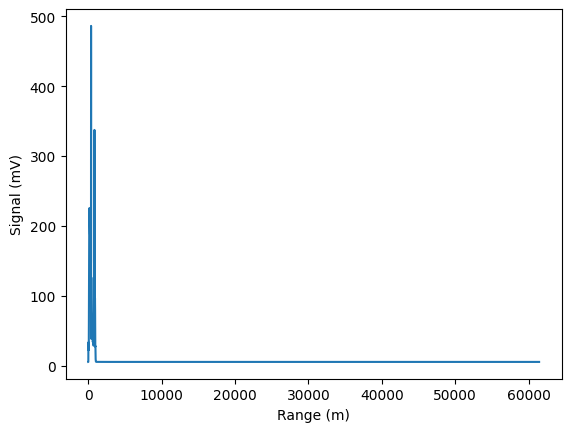

In [8]:
plt.plot(channel.z, channel.data)
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

# Reading a measurement (multiple files)

In [9]:
# Find files in directory
files = glob.glob('./sample_data/measurement_1/*')
print(files)


['./sample_data/measurement_1\\a24C0506.105499', './sample_data/measurement_1\\a24C0506.113644', './sample_data/measurement_1\\a24C0506.121789', './sample_data/measurement_1\\a24C0506.125934', './sample_data/measurement_1\\a24C0506.134078', './sample_data/measurement_1\\a24C0506.142223', './sample_data/measurement_1\\a24C0506.150367', './sample_data/measurement_1\\a24C0506.153411']


In [10]:
# Read all files
measurements = licel.LicelLidarMeasurement(files)

In [11]:
# Print available channels
print("Available channels: ", measurements.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


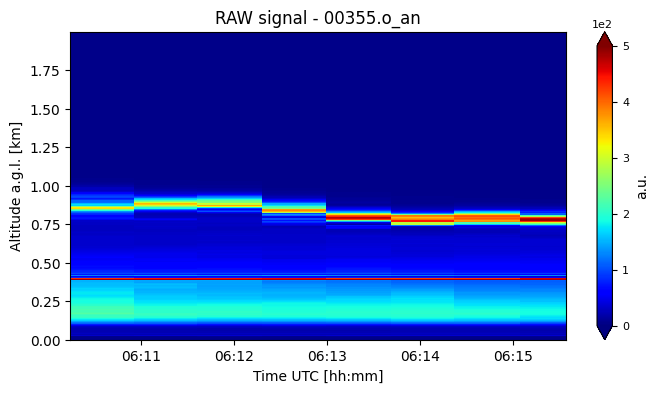

In [12]:
# Plot a single channel
measurements.channels['00355.o_an'].plot(signal_type='raw', zoom=[0, 2000, 0, None], vmax=500)

In [13]:
# Subset by channels
subset_channels = measurements.subset_by_channels(['00355.o_an', '00395.s_an', '00353.o_an'])
print("Available channels: ", subset_channels.channels.keys())

Available channels:  dict_keys(['00355.o_an', '00395.s_an', '00353.o_an'])


In [20]:
# Subset by bins
subset_bins = subset_channels.subset_by_bins(0, 1000)

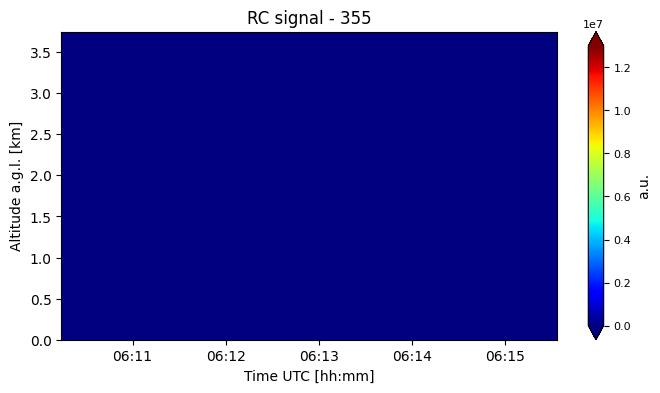

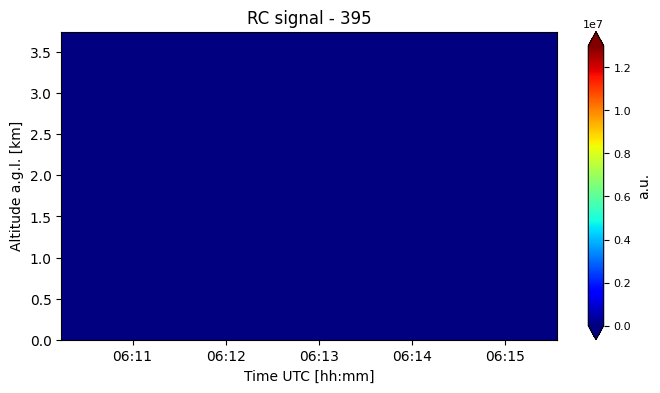

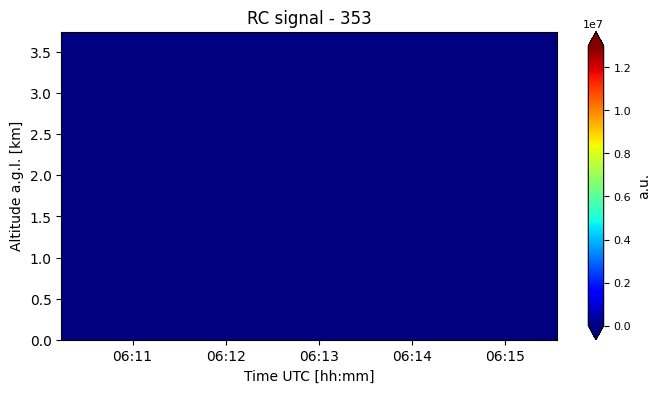

In [22]:
# Plot all channels
subset_bins.plot()

In [23]:
# Getting matrix of data
data = subset_bins.channels['00355.o_an'].matrix
print(data)
print(data.shape)

[[5.19810471 5.19452849 5.21041927 ... 5.20119825 5.20152252 5.20161383]
 [5.19500184 5.19111068 5.20678341 ... 5.19754936 5.19796121 5.19775622]
 [5.19006893 5.18648526 5.20174615 ... 5.19346625 5.19310471 5.19296122]
 ...
 [5.19561682 5.19205738 5.20805251 ... 5.20029628 5.20101376 5.20120385]
 [5.19479871 5.19137531 5.20682255 ... 5.19855756 5.19908681 5.1992974 ]
 [5.19103872 5.18790181 5.20432029 ... 5.19351054 5.19419093 5.19396413]]
(8, 1000)


Text(0.5, 0, 'Range (m)')

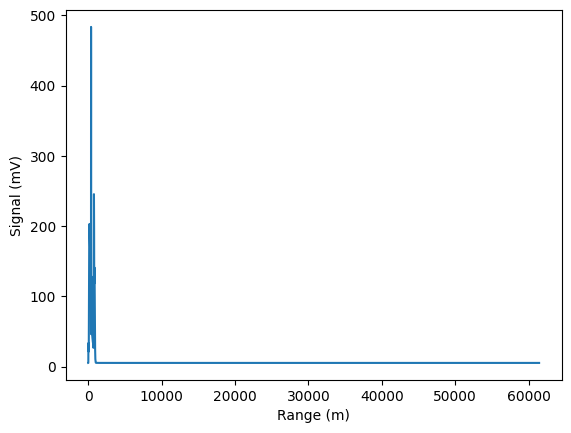

In [24]:
# Average of data
channel = subset_channels.channels['00355.o_an']
plt.plot(channel.z, channel.average_profile())
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')